In [ ]:
# Yarden Dahan, 208730523

# Goals - 


* Learn how to write a dataloader for various datasets and tasks (classification, segmentation,detection, etc.)
* Learn to add augmentation capability to the dataloader.
* Practice the useage of a common augmentation library.

## Preparatory report
1. Read and summarize (3 - 10 lines) the [documentation of pytorch dataset](https://pytorch.org/tutorials/recipes/recipes/custom_dataset_transforms_loader.html#developing-custom-pytorch-dataloaders).
make sure to take a closer look at section 1.2: "Create a dataset class".
2. Read and summarize (3 - 10 lines) the [documentation of albumentations' image augmentation for classification](https://albumentations.ai/docs/getting_started/image_augmentation/).  
3. Use Albumentation to perform the following augmentations with probabilities based on the last digits of your id number:  

* The augmentations:
  * Flip
  * Rotate
  * Blur
* The probability of each augmentation would be from the last digit to the 7th digit of your id number divided by 10. If your last digits are zeros, take the rightmost triplet ending with non zero:
  * example 1: if your ID is 123456789: The probability of Flip is 0.9, the probability of Rotate is 0.8 and the probability of Blur is 0.7.
  * example 2: if your ID is 123456700: The probability of Flip is 0.7, the probability of Rotate is 0.6 and the probability of Blur is 0.5.

# Pytorch dataset- Summary 


## **DataLoader:**   
  Combines a dataset and a sampler, and provides an iterable over the given dataset. The DataLoader supports both map-style and iterable-style datasets with single- or multi-process loading, customizing loading order and optional automatic batching (collation) and memory pinning.
  * 
          DataLoader(dataset, batch_size=1, shuffle=False, sampler=None, 
          batch_sampler=None, num_workers=0, collate_fn=None, pin_memory=False, drop_last=False, timeout=0, worker_init_fn=None, *, prefetch_factor=2,
          persistent_workers=False)


        

## Custome Dataset-  
  * 1.1 Load Dataset 
  * 1.2 Create class that inheriet from `Dataset` override next methods:
    * `__len__(self)`
    * `__getitem__(self, idx)`
  * 1.3 Iterate on this dataset using for loop & dataset[i].


## Custom Transformations-
  * 2.1 Dealing with the issue:   
  The samples may not all be the same size. Therefore, we will need to write some prepocessing code. Let’s create three transforms:
    * 2.1.1  `Rescale` .
    * 2.1.2  `RandomCrop` (data augmentation).
    * 2.1.3  `ToTensor` (convert numpy images to torch images).
  * 2.2 Creating callable classes for each transform.
    * override `__call__(self, sample)` method (if needed also `__init__`)
  * 2.3 Compose transforms and apply to a sample-
    * using `torchvision.transforms.Compose` we can compose tranforms together. 
      * `composed = transforms.Compose([Rescale(256),                      RandomCrop(224)])`
      * 
            for i, tsfrm in enumerate([scale, crop, composed]):  
              transformed_sample = tsfrm(sample)
  * 2.4 Iterate through the dataset so now every time this dataset is sampled:
    * An image is read from the file on the fly
    * Transforms are applied on the read image 
    * Since one of the transforms is random, data is augmentated on sampling

Finally custom DataLoader: 

      dataloader = DataLoader(transformed_dataset, batch_size=4, shuffle=True, num_workers=4)

# Albumentations - image augmentation for classification -Summary



`import albumentations as A`

## Define an augmentation pipeline:
  * **Pipeline** parallelism is when multiple steps depend on each other, but the execution can overlap and the output of one step is streamed as input to the next step.
    * Create an instance of the Compose class, and pass a list of augmentations to apply.   
    [Augmentation](https://github.com/albumentations-team/albumentations#pixel-level-transforms)
    ![picture](https://drive.google.com//uc?export=view&id=1qqZlNTDZxlWdRhkHIKqE_4i330MxiETi) 


# Imports 

In [ ]:
import numpy as np
import cv2 
import os
import random
from matplotlib import pyplot as plt
import albumentations as A

--2022-03-26 20:25:43--  https://d1nslcd7m2225b.cloudfront.net/Pictures/480xAny/9/7/4/1106974_Kung_Fu_Panda_1.jpg
Resolving d1nslcd7m2225b.cloudfront.net (d1nslcd7m2225b.cloudfront.net)... 13.249.90.84, 13.249.90.169, 13.249.90.91, ...
Connecting to d1nslcd7m2225b.cloudfront.net (d1nslcd7m2225b.cloudfront.net)|13.249.90.84|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14216 (14K) [image/jpeg]
Saving to: ‘panda.jpg’

panda.jpg           100%[===================>]  13.88K  --.-KB/s    in 0s      

2022-03-26 20:25:43 (184 MB/s) - ‘panda.jpg’ saved [14216/14216]



<Figure size 720x720 with 0 Axes>

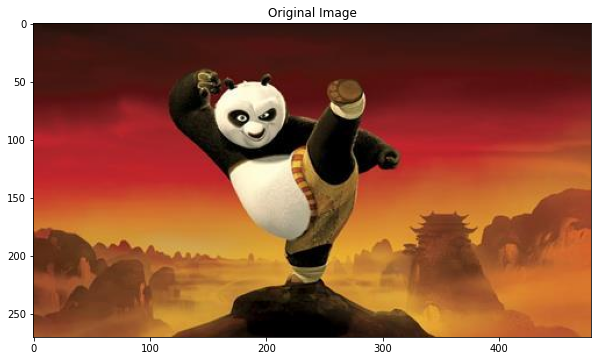

In [ ]:
def set_image(url):
  image= cv2.imread(url)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  return image
def augment_image(augment,image):
  image = augment(image=image)['image']
  return image
def show_image(img,title = ' '):
  plt.figure(figsize=(10, 10))
  plt.title(title)
  plt.imshow(img)

!wget https://d1nslcd7m2225b.cloudfront.net/Pictures/480xAny/9/7/4/1106974_Kung_Fu_Panda_1.jpg -O panda.jpg
img = set_image('panda.jpg')
oImg = img.copy()
plt.figure(figsize=(10, 10))
show_image(img,title = "Original Image")

# Implementation-


## Flip

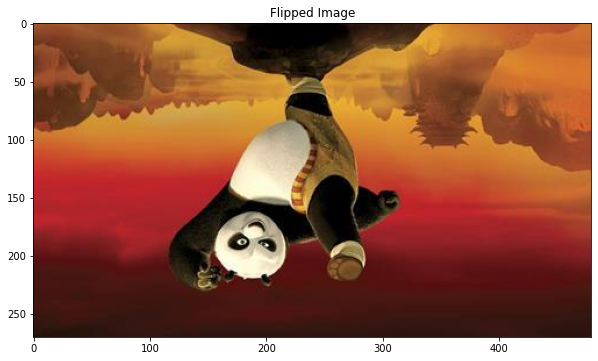

In [ ]:
flip_image = A.Flip(0.5)
fImage = augment_image(flip_image, img)
show_image(fImage, title = "Flipped Image")

## Rotate

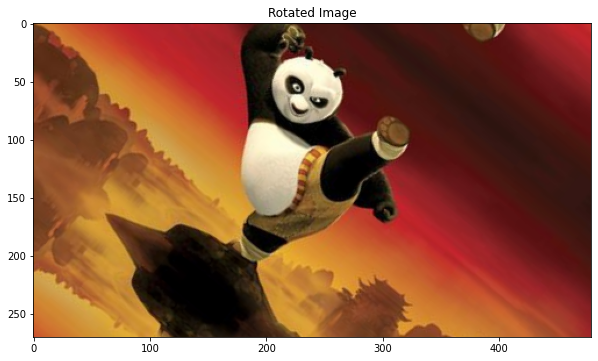

In [ ]:
rotated_img = A.Rotate(p=0.5)
rImage = augment_image(rotated_img, img)
show_image(rImage, title = "Rotated Image")

## Blur

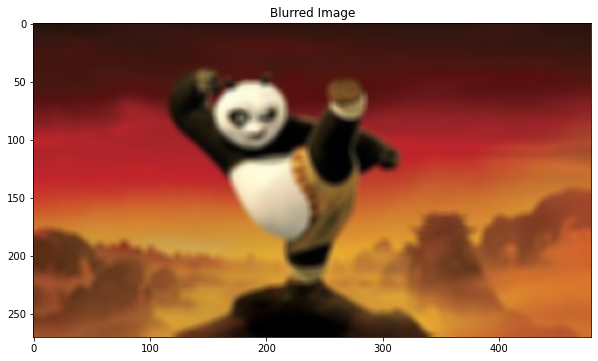

In [ ]:
blurred_img = A.Blur(p=1)
bImage = augment_image(blurred_img, img)
show_image(bImage, title = "Blurred Image")

# Flip, Rotate & Blur

* probability for flip is 0.5
* probability of Rotate is 0.2
* probability of Blur is 0.3

In [ ]:
def plot_alot(img_list,rows,cols):
  plt.figure(figsize=[30, 10])
  for i in range(len(img_list)):
    plt.subplot(rows,cols,i+1)
    plt.imshow(img_list[i])
  plt.show()
  


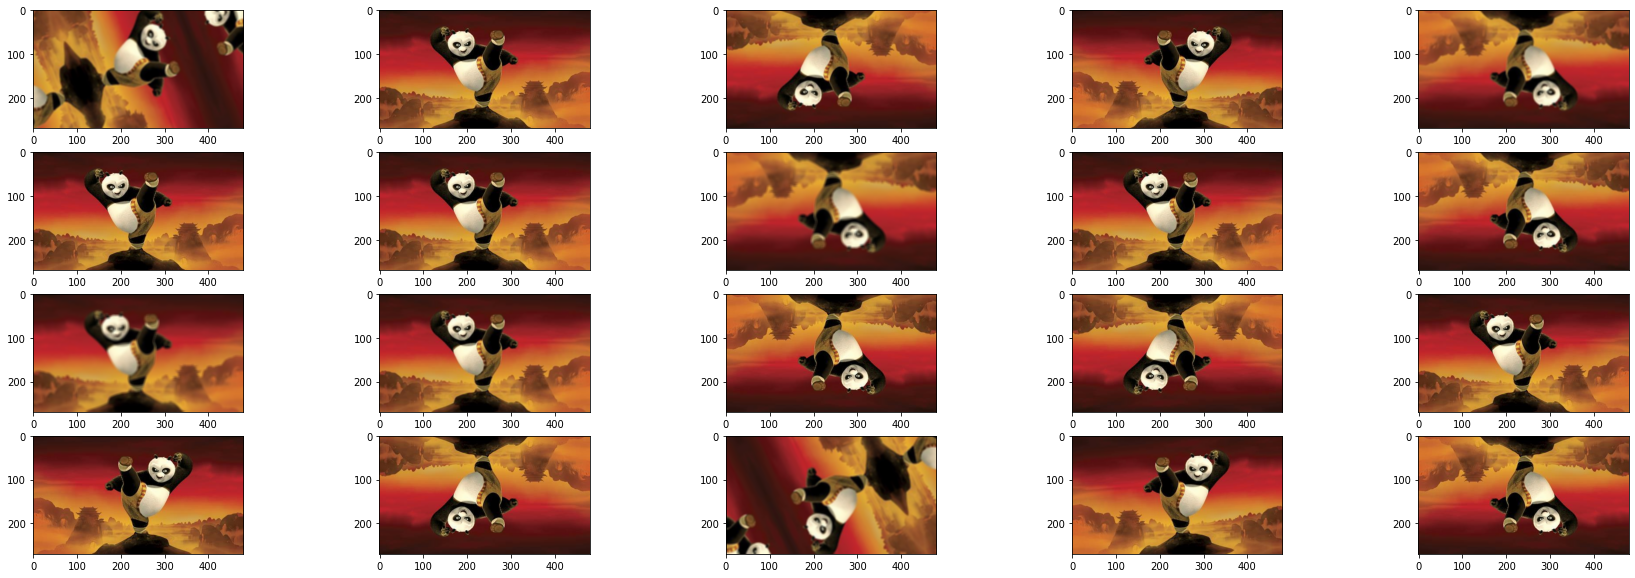

In [ ]:
total_images = 20
augment_images = []
for i in range(total_images):
  new_img = augment_image(A.Compose([A.Flip(p=0.5),A.Rotate(p=0.2),A.Blur(p=0.3)]),oImg)
  augment_images.append(new_img)
plot_alot(augment_images,4,5)

# Conclusion:
The variable p=0.5 means that with a probability of 50%, the transform will flip the image horizontally, and with a probability of 50%, the transform won't modify the input image.